In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib

In [2]:
df = pd.read_csv('D:/Dixant/CDAC/Machine Learning/17-12-21/Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


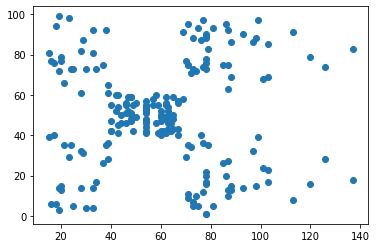

In [4]:
plt.scatter(x=df['Annual_Income_(k$)'],y=df['Spending_Score'])

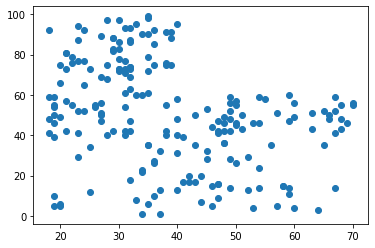

In [5]:
plt.scatter(x=df['Age'],y=df['Spending_Score'])

In [6]:
df.drop(['CustomerID'],axis= 1 ,inplace=True)
df.drop(['Genre'],axis= 1 ,inplace=True)
df.drop(['Age'],axis= 1 ,inplace=True)
df

,Annual_Income_(k$),Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Annual_Income_(k$)  200 non-null    int64
 1   Spending_Score      200 non-null    int64
dtypes: int64(2)
memory usage: 3.2 KB


In [8]:
from sklearn.cluster import KMeans
k_means=KMeans(n_clusters=5,random_state=42)
k_means.fit(df)

KMeans(n_clusters=5, random_state=42)

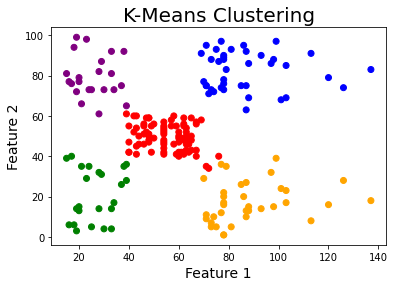

In [9]:
df['KMeans_labels']=k_means.labels_
# Plotting resulting clusters
colors=['purple','red','blue','green','orange']
plt.figure()
plt.scatter(df['Annual_Income_(k$)'],df['Spending_Score'],c=df['KMeans_labels'],cmap=matplotlib.colors.ListedColormap(colors))
plt.title('K-Means Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [10]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean')
model.fit(df[['Annual_Income_(k$)','Spending_Score']])

AgglomerativeClustering(n_clusters=5)

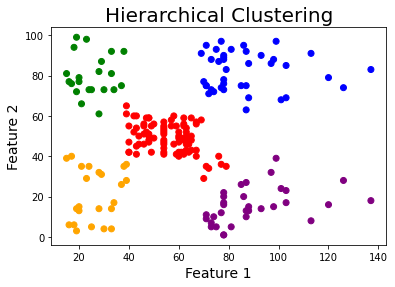

In [11]:
df['HR_labels']=model.labels_
# Plotting resulting clusters
plt.figure()
plt.scatter(df['Annual_Income_(k$)'],df['Spending_Score'],c=df['HR_labels'],cmap=matplotlib.colors.ListedColormap(colors))
plt.title('Hierarchical Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [12]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
dbscan.fit(df[['Annual_Income_(k$)','Spending_Score']])

DBSCAN()

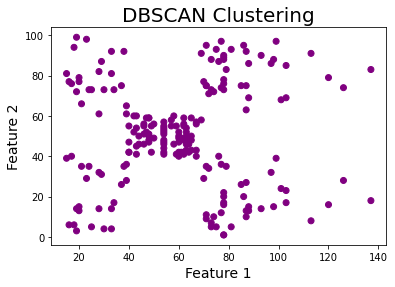

In [13]:
df['DBSCAN_labels']=dbscan.labels_
# Plotting resulting clusters
plt.figure()
plt.scatter(df['Annual_Income_(k$)'],df['Spending_Score'],c=df['DBSCAN_labels'],cmap=matplotlib.colors.ListedColormap(colors))
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [14]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df[['Annual_Income_(k$)','Spending_Score']])
distances, indices = nbrs.kneighbors(df[['Annual_Income_(k$)','Spending_Score']])

In [15]:
distances[:,1]

array([ 2.23606798,  4.12310563,  2.        ,  1.41421356,  2.23606798,
        1.41421356,  2.        ,  5.09901951,  3.16227766,  4.47213595,
        1.41421356,  4.12310563,  1.41421356,  2.        ,  1.41421356,
        2.        ,  3.        ,  6.32455532,  5.83095189,  4.12310563,
        3.        ,  1.        ,  5.09901951,  1.        ,  5.        ,
        5.09901951,  1.41421356,  8.60232527,  1.41421356,  5.09901951,
        3.        ,  4.        ,  3.        ,  5.        ,  3.16227766,
        5.09901951,  3.16227766,  3.60555128,  2.82842712,  3.60555128,
        1.41421356,  5.        ,  1.41421356,  3.16227766,  2.82842712,
        4.        ,  3.16227766,  3.60555128,  0.        ,  0.        ,
        2.23606798,  1.        ,  2.23606798,  1.        ,  1.41421356,
        3.16227766,  2.23606798,  1.41421356,  1.41421356,  2.        ,
        1.        ,  1.        ,  1.41421356,  1.        ,  1.        ,
        0.        ,  1.        ,  1.        ,  0.        ,  1.  

In [16]:
distances

array([[ 0.        ,  2.23606798],
       [ 0.        ,  4.12310563],
       [ 0.        ,  2.        ],
       [ 0.        ,  1.41421356],
       [ 0.        ,  2.23606798],
       [ 0.        ,  1.41421356],
       [ 0.        ,  2.        ],
       [ 0.        ,  5.09901951],
       [ 0.        ,  3.16227766],
       [ 0.        ,  4.47213595],
       [ 0.        ,  1.41421356],
       [ 0.        ,  4.12310563],
       [ 0.        ,  1.41421356],
       [ 0.        ,  2.        ],
       [ 0.        ,  1.41421356],
       [ 0.        ,  2.        ],
       [ 0.        ,  3.        ],
       [ 0.        ,  6.32455532],
       [ 0.        ,  5.83095189],
       [ 0.        ,  4.12310563],
       [ 0.        ,  3.        ],
       [ 0.        ,  1.        ],
       [ 0.        ,  5.09901951],
       [ 0.        ,  1.        ],
       [ 0.        ,  5.        ],
       [ 0.        ,  5.09901951],
       [ 0.        ,  1.41421356],
       [ 0.        ,  8.60232527],
       [ 0.        ,

In [17]:
indices

array([[  0,   4],
       [  1,   3],
       [  2,   6],
       [  3,   5],
       [  4,   0],
       [  5,   3],
       [  6,   2],
       [  7,  11],
       [  8,   6],
       [  9,   5],
       [ 10,  12],
       [ 11,  19],
       [ 12,  10],
       [ 13,  15],
       [ 14,  10],
       [ 15,  13],
       [ 16,  20],
       [ 17,   9],
       [ 18,  26],
       [ 19,  11],
       [ 20,  16],
       [ 21,  23],
       [ 22,  30],
       [ 23,  21],
       [ 24,  34],
       [ 25,  29],
       [ 26,  28],
       [ 27,  17],
       [ 28,  26],
       [ 29,  25],
       [ 30,  32],
       [ 31,  37],
       [ 32,  30],
       [ 33,  41],
       [ 34,  36],
       [ 35,  25],
       [ 36,  34],
       [ 37,  39],
       [ 38,  44],
       [ 39,  37],
       [ 40,  42],
       [ 41,  33],
       [ 42,  40],
       [ 43,  51],
       [ 44,  38],
       [ 45,  43],
       [ 46,  52],
       [ 47,  54],
       [ 49,  48],
       [ 49,  48],
       [ 50,  52],
       [ 51,  53],
       [ 52,

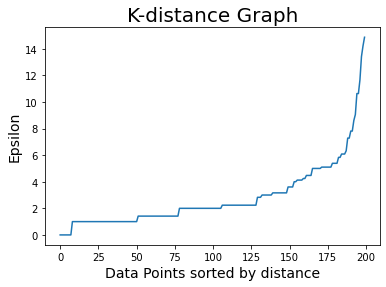

In [18]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure()
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [22]:
from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=5,min_samples=5)
dbscan_opt.fit(df)


DBSCAN(eps=5)

In [23]:
df['DBSCAN_opt_labels']=dbscan_opt.labels_
df['DBSCAN_opt_labels'].value_counts()

-1    88
 1    78
 2    10
 4     9
 3     9
 0     6
Name: DBSCAN_opt_labels, dtype: int64

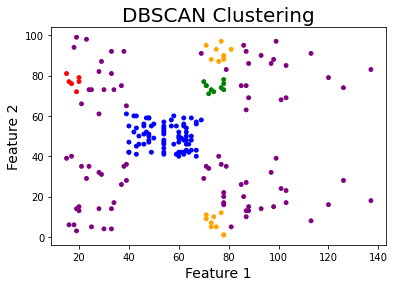

In [30]:
# Plotting the resulting clusters
plt.figure()
plt.scatter(df['Annual_Income_(k$)'],df['Spending_Score'],c=df['DBSCAN_opt_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [33]:
from sklearn import metrics
print(metrics.silhouette_score(df))

TypeError: silhouette_score() missing 1 required positional argument: 'labels'